In [7]:
import numpy as np
import pandas as pd

In [22]:
np.random.seed(52)

In [23]:
size = np.random.randint(500,5000,1000)
bedroom = np.random.randint(1,6,1000)
location = np.random.randint(1,11,1000)
age = np.random.randint(1,51,1000)
price = (size * 300) + (bedroom * 50000) + (location * 20000) - (age * 2000) + np.random.randint(-20000,20000,1000)
df = pd.DataFrame({"SIZE":size, "BEDROOMS":bedroom,"LOCATIONS":location,"Age":age,"Price":price})
csv_filename="house_price_data.csv"
df.to_csv(csv_filename, index=False)
print(f"Dataset saved as '{csv_filename}'with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset saved as 'house_price_data.csv'with 1000 rows and 5 columns.


In [24]:
import pandas as pd
df= pd.read_csv("house_price_data.csv")
print(df.head())

   SIZE  BEDROOMS  LOCATIONS  Age    Price
0  2192         5          7   14  1001568
1  3327         5          3   47  1208868
2  4747         3          1   32  1546380
3  1424         5          3   32   672370
4  1003         5          4   43   542029


In [25]:
print("\nMissing Values:\n", df.isnull().sum())
print("\n Dataset Summary:\n", df.describe())


Missing Values:
 SIZE         0
BEDROOMS     0
LOCATIONS    0
Age          0
Price        0
dtype: int64

 Dataset Summary:
               SIZE     BEDROOMS   LOCATIONS          Age         Price
count  1000.000000  1000.000000  1000.00000  1000.000000  1.000000e+03
mean   2828.875000     3.012000     5.24200    25.234000  1.053239e+06
std    1277.804237     1.423335     2.86385    15.079411  3.960524e+05
min     501.000000     1.000000     1.00000     1.000000  2.130740e+05
25%    1687.500000     2.000000     3.00000    12.000000  7.220990e+05
50%    2828.000000     3.000000     5.00000    24.000000  1.060229e+06
75%    3926.750000     4.000000     8.00000    39.000000  1.390171e+06
max    4997.000000     5.000000    10.00000    50.000000  1.848571e+06


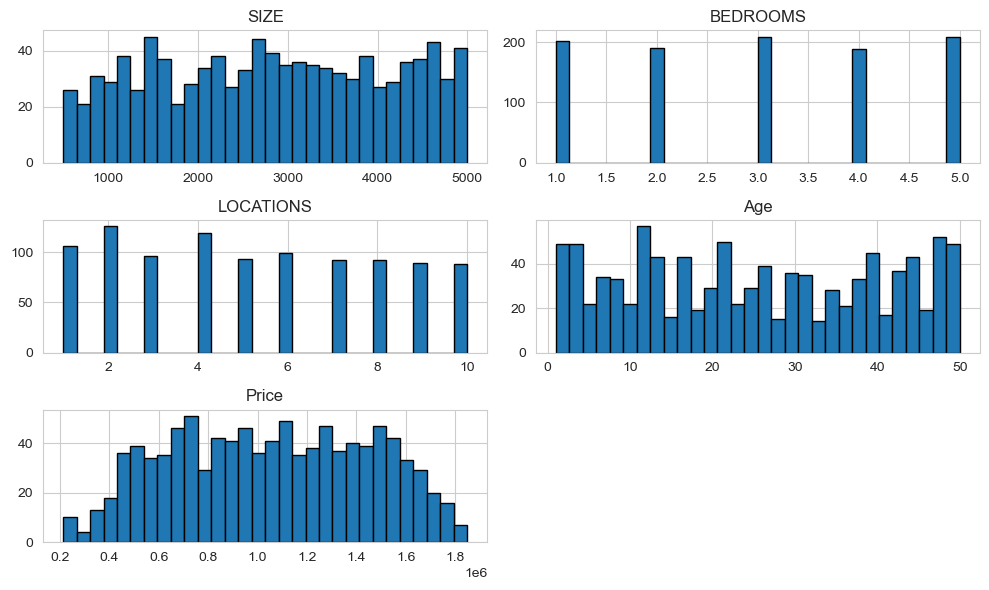

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df.hist(figsize=(10,6),bins=30,edgecolor="black")
plt.tight_layout()
plt.show()

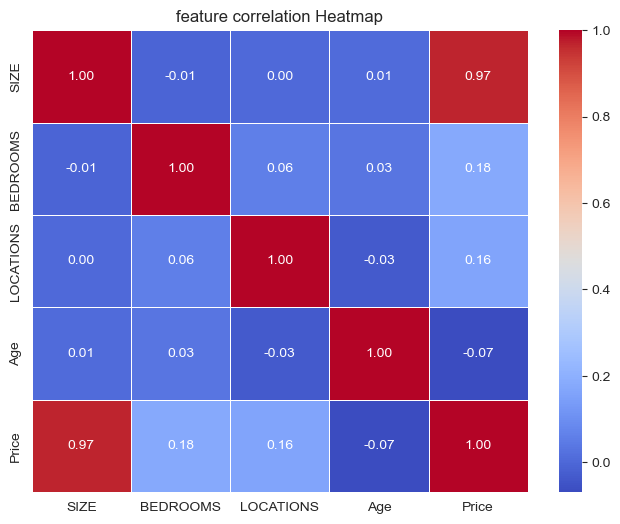

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("feature correlation Heatmap")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score
x = df[["SIZE","BEDROOMS","LOCATIONS","Age"]]
y = df["Price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMODEL PERFORMANCE:\nMAR: {mae:.2f},R2 score: {r2:.2f}")


MODEL PERFORMANCE:
MAR: 9490.74,R2 score: 1.00


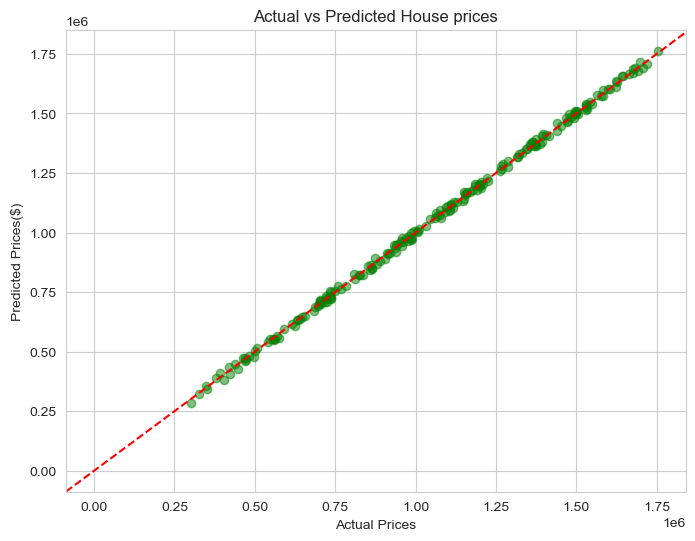

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color = "green")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices($)")
plt.title("Actual vs Predicted House prices")
plt.axline([0,0], slope = 1,color = "red",linestyle = "--")
plt.show()